In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from pinns import *

In [2]:
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
dev_str = f"{device.type}:{device.index}"

## Brusselator PDEs

> The Brusselator PDEs for two species are
<h3><center>$\partial_t u = D_u (\partial_x^2 + \partial_y^2)u + A - (B+1)u + u^2v$</center></h3>

<h3><center>$\partial_t v = D_v (\partial_x^2 + \partial_y^2)v + Bu - u^2 v$</center></h3>

for diffusion constants $D_u$, $D_v$, and model parameters $A, B > 0$.
Therefore, the kinetic terms are

<h3><center>$f(u,v) = A - (B+1)u + u^2v$</center></h3>
<h3><center>$g(u,v) = Bu - u^2 v$</center></h3>

<h3><center>$u^* = A$</center></h3>
<h3><center>$v^* = \frac{B}{A}$</center></h3>



In [3]:
def plot_n_im(arrays, titles=None, add_colorbar=True, figsize=(12, 8), fraction=0.15, shrink=1.0):
    cols = len(arrays)
    if titles is not None:
        assert len(titles) == cols, f"Titles len'{len(titles)}' is not equal to arrays '{col}'."
    plt.figure(figsize=figsize)
    for i in range(cols):
        ax = plt.subplot(1, cols, i+1)
        if titles is not None:
            ax.set_title(titles[i])
        img = plt.imshow(arrays[i])
        if add_colorbar:
            plt.colorbar(img, fraction=fraction, shrink=shrink)


Epoch: 0
loss boundary: 0.000546, loss physics: 86.603806, loss laplacian: 1.999985,  loss initail condition: 19.476337
Laplacian U: 0.000006, Laplacian V: 0.000009


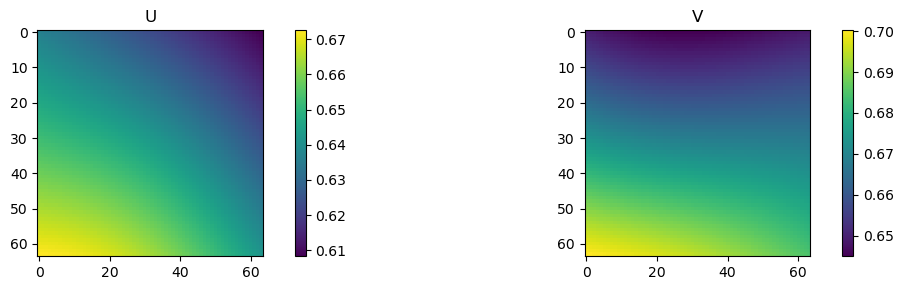

Epoch: 1000
loss boundary: 0.028761, loss physics: 171.223770, loss laplacian: 1.987044,  loss initail condition: 0.162561
Laplacian U: 0.008437, Laplacian V: 0.004565


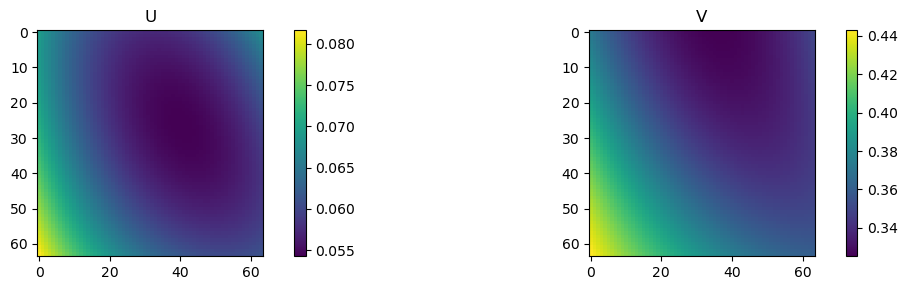

Epoch: 2000
loss boundary: 0.025229, loss physics: 65.209175, loss laplacian: 1.989757,  loss initail condition: 0.153801
Laplacian U: 0.004290, Laplacian V: 0.005981


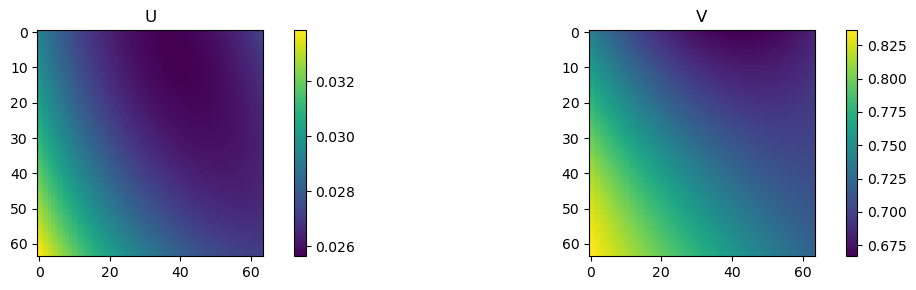

Epoch: 3000
loss boundary: 0.076490, loss physics: 35.775082, loss laplacian: 1.965847,  loss initail condition: 0.115059
Laplacian U: 0.001560, Laplacian V: 0.033137


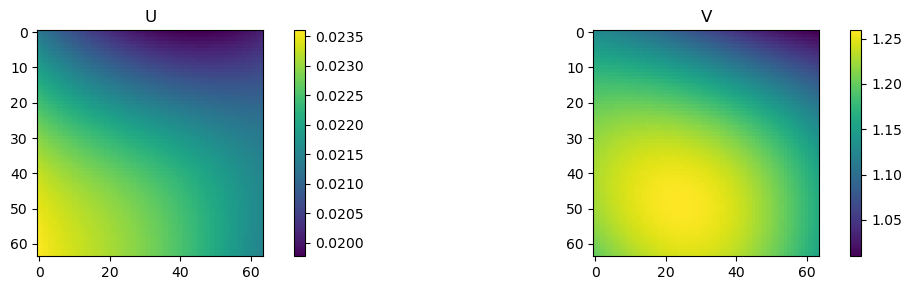

Epoch: 4000
loss boundary: 0.626564, loss physics: 26.696434, loss laplacian: 1.433105,  loss initail condition: 0.023911
Laplacian U: 0.141864, Laplacian V: 0.570283


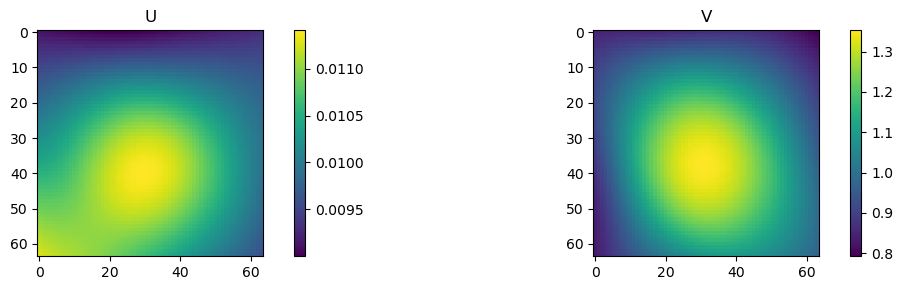

Epoch: 5000
loss boundary: 1.213086, loss physics: 22.357622, loss laplacian: 0.052293,  loss initail condition: 0.018601
Laplacian U: 3.025015, Laplacian V: 5.589660


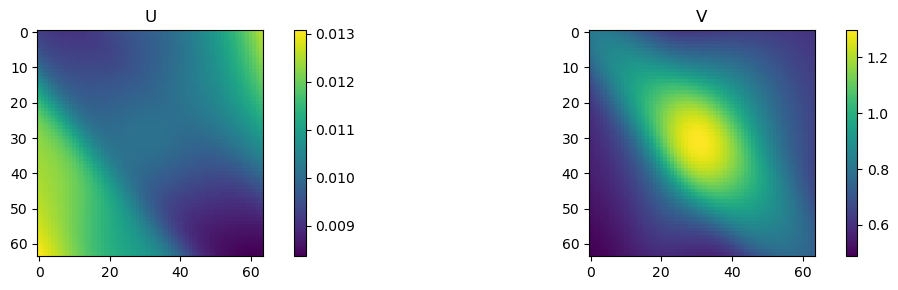

Epoch: 6000
loss boundary: 0.791601, loss physics: 18.601662, loss laplacian: 0.013982,  loss initail condition: 0.010287
Laplacian U: 4.370872, Laplacian V: 6.613551


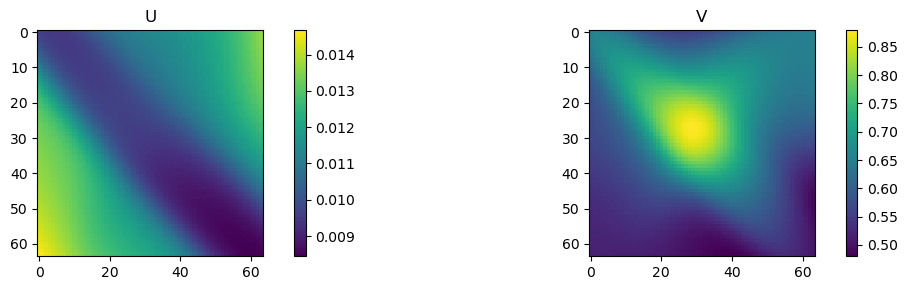

Epoch: 7000
loss boundary: 0.371744, loss physics: 14.454690, loss laplacian: 0.006019,  loss initail condition: 0.005430
Laplacian U: 5.243819, Laplacian V: 7.210837


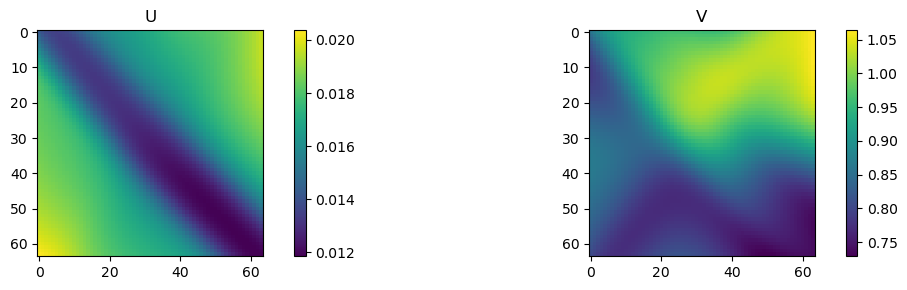

Epoch: 8000
loss boundary: 0.157647, loss physics: 10.092548, loss laplacian: 0.003286,  loss initail condition: 0.003153
Laplacian U: 5.845301, Laplacian V: 7.843663


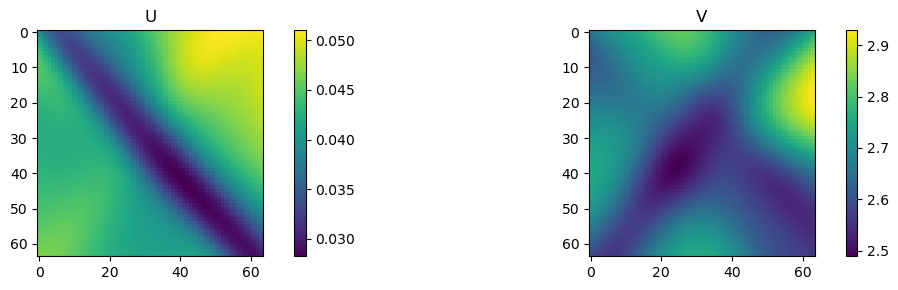

Epoch: 9000
loss boundary: 0.079749, loss physics: 6.491400, loss laplacian: 0.001807,  loss initail condition: 0.001622
Laplacian U: 6.420983, Laplacian V: 8.625599


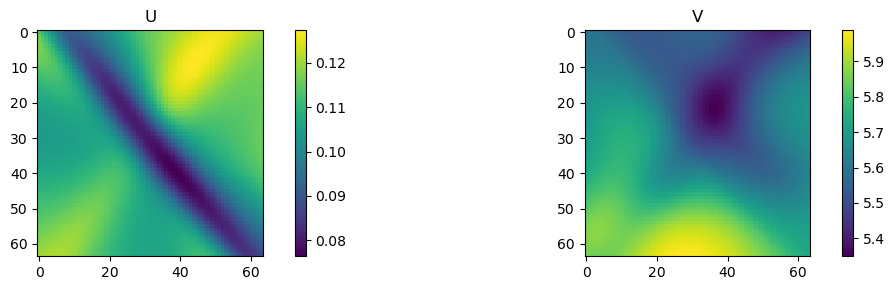

Epoch: 10000
loss boundary: 0.052123, loss physics: 4.068889, loss laplacian: 0.001020,  loss initail condition: 0.000849
Laplacian U: 6.926981, Laplacian V: 10.145336


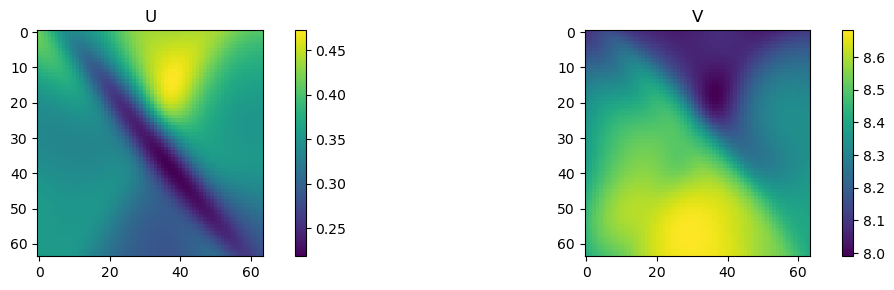

Epoch: 11000
loss boundary: 0.011164, loss physics: 1.017390, loss laplacian: 0.000400,  loss initail condition: 0.000583
Laplacian U: 8.509199, Laplacian V: 8.524104


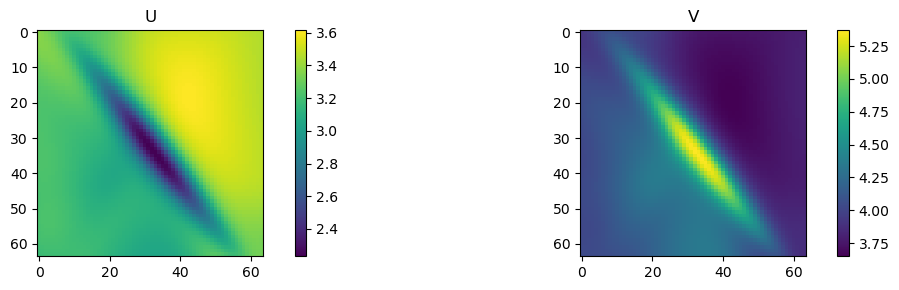

Epoch: 12000
loss boundary: 0.006918, loss physics: 0.712584, loss laplacian: 0.000251,  loss initail condition: 0.000338
Laplacian U: 9.467880, Laplacian V: 8.659135


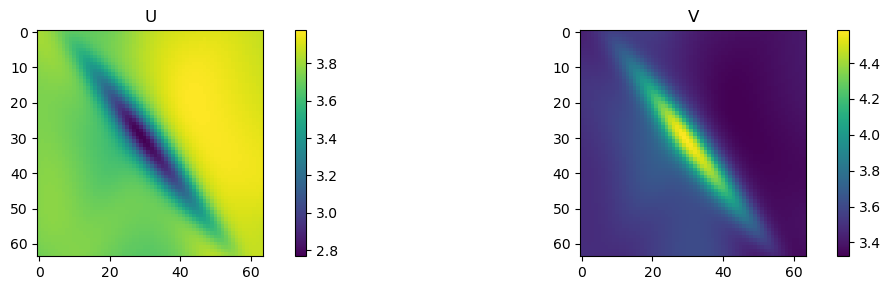

Epoch: 13000
loss boundary: 0.004136, loss physics: 0.530311, loss laplacian: 0.000164,  loss initail condition: 0.000160
Laplacian U: 10.172957, Laplacian V: 8.977738


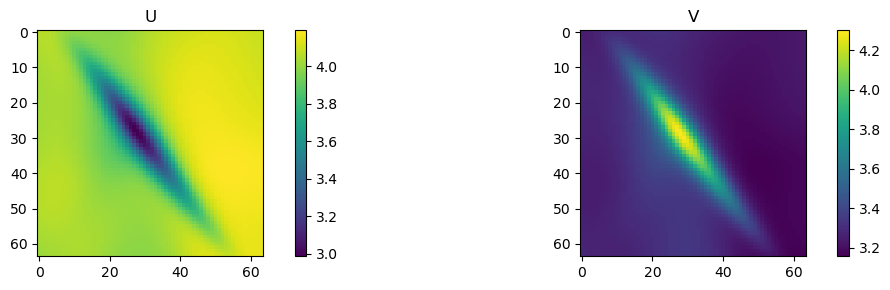

Epoch: 14000
loss boundary: 0.002267, loss physics: 0.404943, loss laplacian: 0.000097,  loss initail condition: 0.000077
Laplacian U: 11.030135, Laplacian V: 9.423266


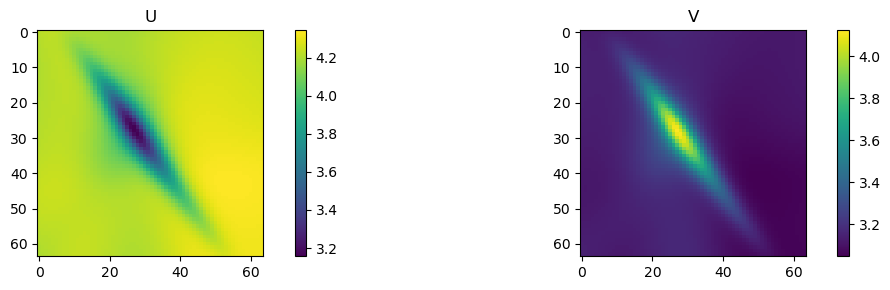

Epoch: 15000
loss boundary: 0.001259, loss physics: 0.316887, loss laplacian: 0.000062,  loss initail condition: 0.000045
Laplacian U: 11.893109, Laplacian V: 9.799122


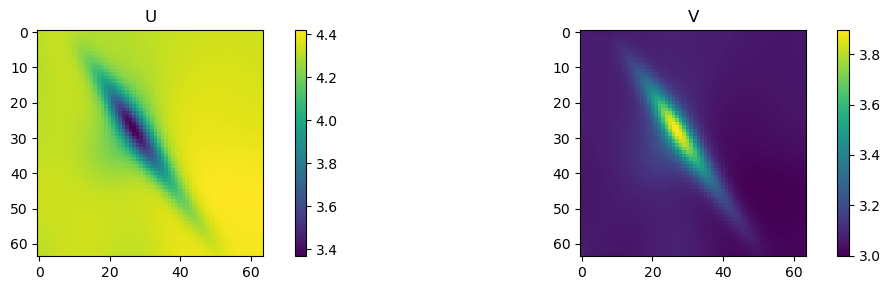

Epoch: 16000
loss boundary: 0.000801, loss physics: 0.255688, loss laplacian: 0.000044,  loss initail condition: 0.000032
Laplacian U: 12.928944, Laplacian V: 10.096166


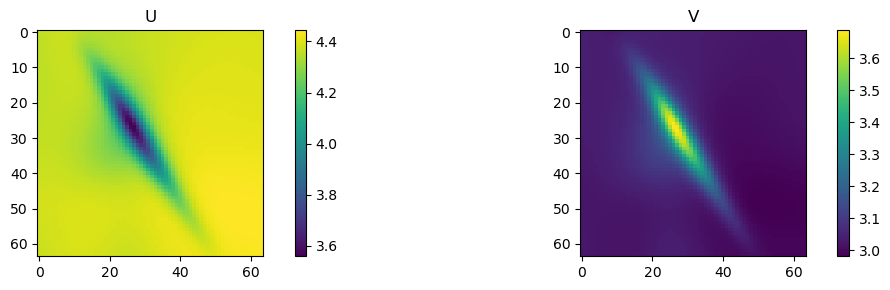

Epoch: 17000
loss boundary: 0.000583, loss physics: 0.212939, loss laplacian: 0.000030,  loss initail condition: 0.000025
Laplacian U: 14.148383, Laplacian V: 10.425975


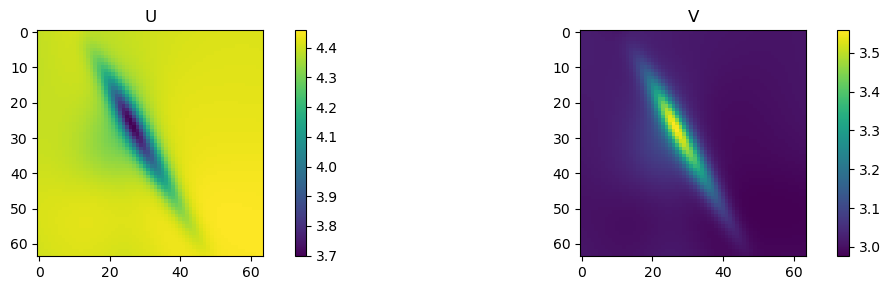

Epoch: 18000
loss boundary: 0.000463, loss physics: 0.184511, loss laplacian: 0.000021,  loss initail condition: 0.000020
Laplacian U: 15.303801, Laplacian V: 10.768673


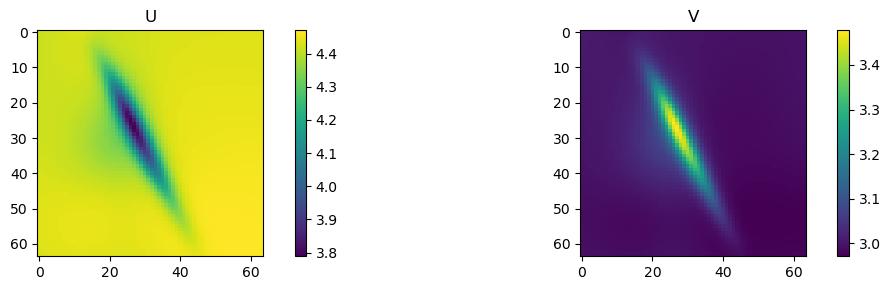

Epoch: 19000
loss boundary: 0.000392, loss physics: 0.168533, loss laplacian: 0.000015,  loss initail condition: 0.000018
Laplacian U: 16.347855, Laplacian V: 11.104277


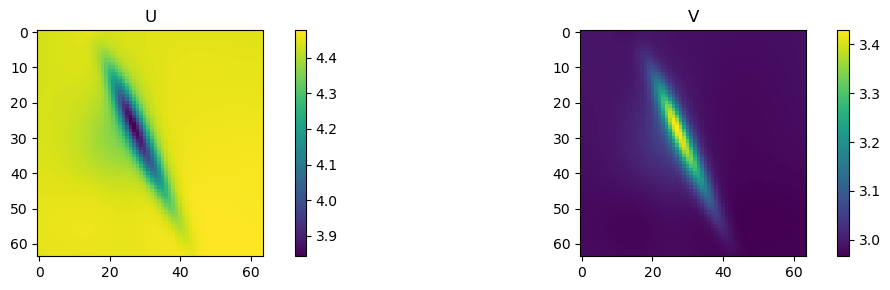

Epoch: 20000
loss boundary: 0.000347, loss physics: 0.151267, loss laplacian: 0.000012,  loss initail condition: 0.000016
Laplacian U: 17.339050, Laplacian V: 11.349882


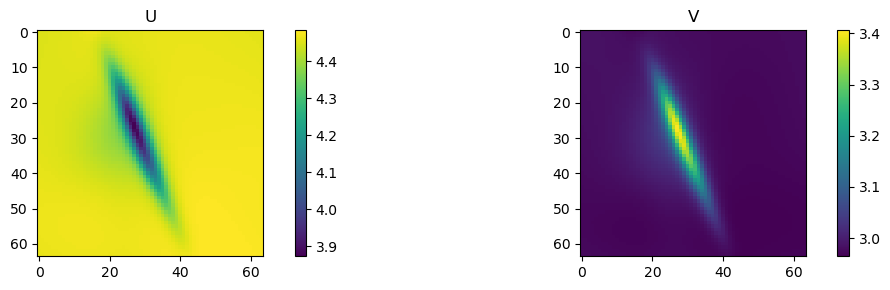

Epoch: 21000
loss boundary: 0.000316, loss physics: 0.141304, loss laplacian: 0.000009,  loss initail condition: 0.000014
Laplacian U: 18.378235, Laplacian V: 11.590982


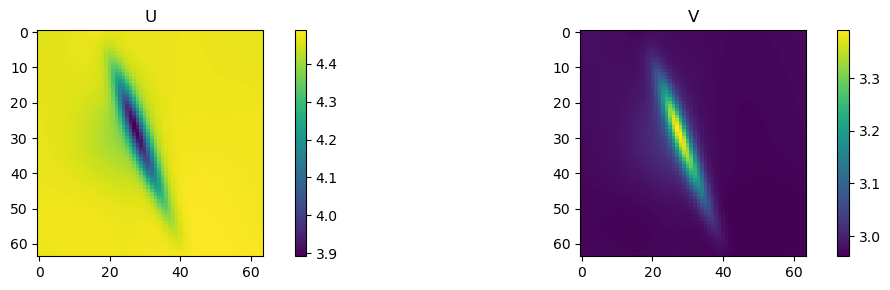

Epoch: 22000
loss boundary: 0.000291, loss physics: 0.135035, loss laplacian: 0.000007,  loss initail condition: 0.000012
Laplacian U: 19.438677, Laplacian V: 11.805243


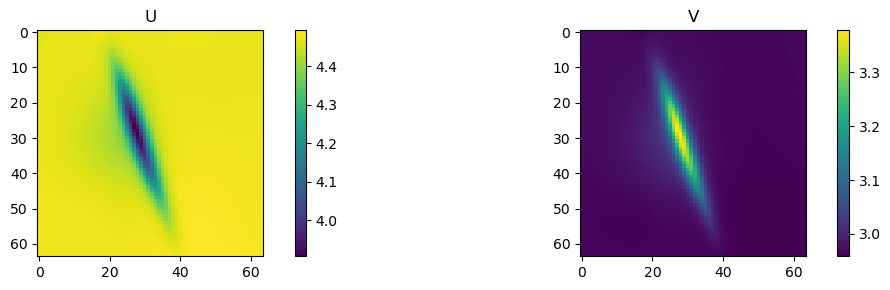

Epoch: 23000
loss boundary: 0.000270, loss physics: 0.128488, loss laplacian: 0.000006,  loss initail condition: 0.000011
Laplacian U: 20.485401, Laplacian V: 11.978317


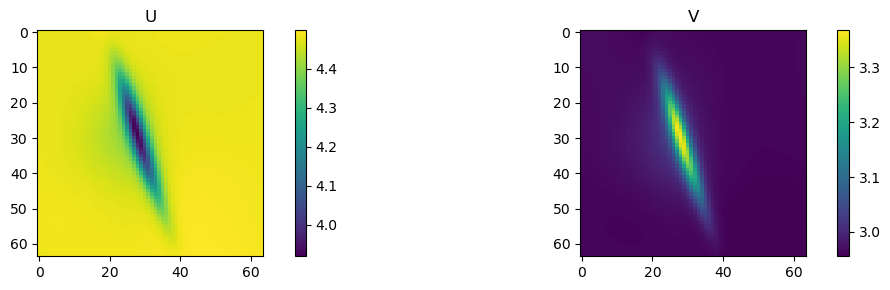

Epoch: 24000
loss boundary: 0.000251, loss physics: 0.123058, loss laplacian: 0.000006,  loss initail condition: 0.000011
Laplacian U: 21.453083, Laplacian V: 12.108636


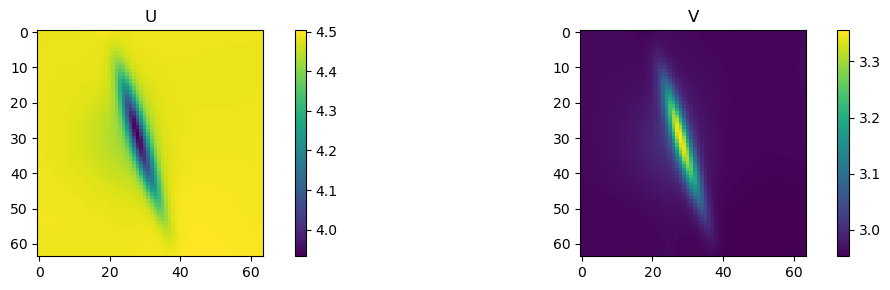

Epoch: 25000
loss boundary: 0.000236, loss physics: 0.118809, loss laplacian: 0.000005,  loss initail condition: 0.000011
Laplacian U: 22.377388, Laplacian V: 12.232503


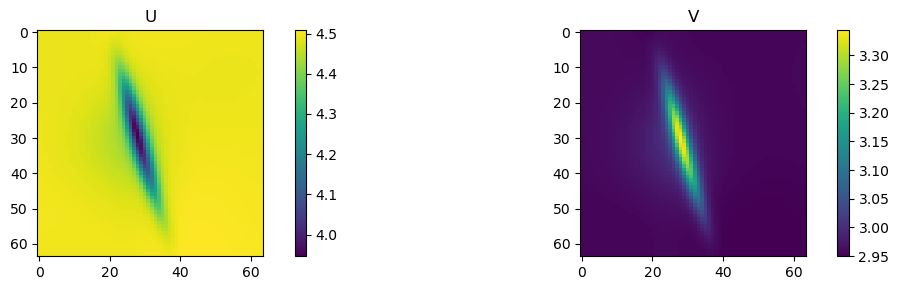

Epoch: 26000
loss boundary: 0.000222, loss physics: 0.116044, loss laplacian: 0.000004,  loss initail condition: 0.000009
Laplacian U: 23.209864, Laplacian V: 12.345949


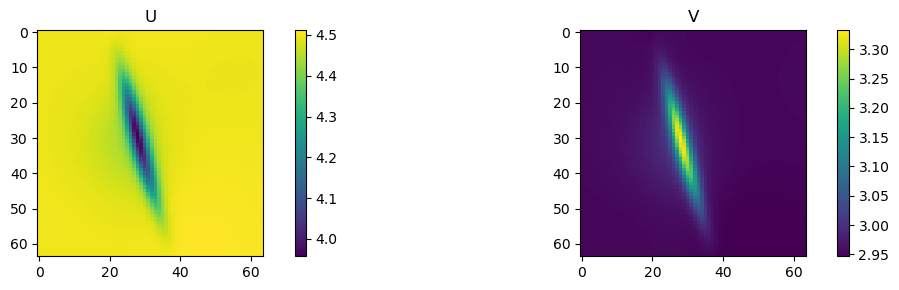

Epoch: 27000
loss boundary: 0.000209, loss physics: 0.113121, loss laplacian: 0.000004,  loss initail condition: 0.000009
Laplacian U: 23.956055, Laplacian V: 12.435637


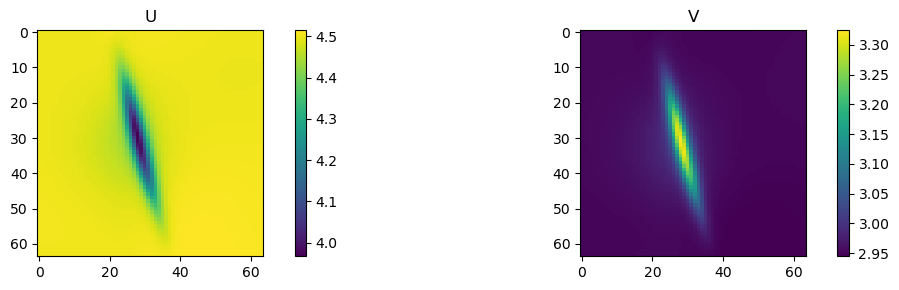

Epoch: 28000
loss boundary: 0.000197, loss physics: 0.110652, loss laplacian: 0.000004,  loss initail condition: 0.000008
Laplacian U: 24.634171, Laplacian V: 12.517114


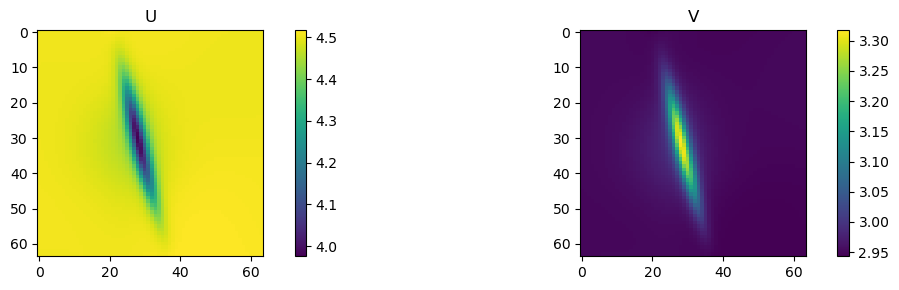

Epoch: 29000
loss boundary: 0.000187, loss physics: 0.108479, loss laplacian: 0.000003,  loss initail condition: 0.000008
Laplacian U: 25.250362, Laplacian V: 12.592923


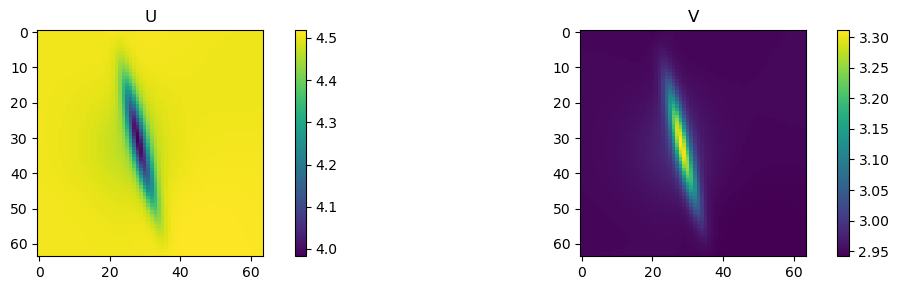

In [88]:
torch.manual_seed(42)
np.random.seed(42)

D_U = 0.0016
D_V = 0.0135

A, B = 4.5, 13.29
Lx, Ly, T_max = 4, 4, 100
Ix, Iy = 32,32
N = Ix*Iy
domain_bounds = torch.tensor([Lx, Ly, T_max]).to(device)

###############################################
# 
x = torch.linspace(0, Lx, Ix).to(device)
y = torch.linspace(0, Ly, Iy).to(device)
t = torch.linspace(0, T_max, T_max+1).to(device)
X,Y = torch.meshgrid(x, y, indexing='ij')
physics_X = torch.vstack([X.flatten(), Y.flatten()]).T
physics_X = torch.hstack([physics_X.repeat(T_max+1, 1), 
                          t.view(-1,1).repeat(1,physics_X.shape[0]).view(-1, 1) ])
# To turn the tensor to a leaf node, we detach and clone it here
physics_X = physics_X.detach().clone()
physics_X.requires_grad = True
##############################################
#
boundary_X_x = torch.hstack([x, 
                             x,
                             torch.ones_like(y)*x[0].item(), 
                             torch.ones_like(y)*x[-1].item()])
boundary_X_y = torch.hstack([torch.ones_like(x)*y[0].item(), 
                             torch.ones_like(x)*y[-1].item(),
                             y,
                             y])
boundary_X = torch.vstack([boundary_X_x, boundary_X_y]).T
boundary_X = torch.hstack([boundary_X.repeat(T_max+1, 1), 
                           t.view(-1,1).repeat(1,boundary_X_x.shape[0]).view(-1, 1).to(device) ])
boundary_X.requires_grad_(True)
########################################
pi = np.pi
rotation_60 = torch.tensor([[np.cos(pi/3), -np.sin(pi/3), 0], 
                            [np.sin(pi/3), np.cos(pi/3) , 0],
                            [0           ,0             , 1]], dtype=torch.float).to(device)
############################################
# Initial condition
X,Y = torch.meshgrid(x, y, indexing='ij')
Initial_X = torch.vstack([X.flatten(), Y.flatten()]).T
Initial_U = A*torch.ones(Initial_X.shape[0]).to(device)
Initial_V = (B/A)*torch.ones(Initial_X.shape[0]).to(device)
#Initial_U += torch.randn_like(Initial_U) * .1
X_centered = X.flatten() - Lx/2
Y_centered = Y.flatten() - Ly/2

Initial_U -= 1.0 * torch.exp(-1.0*(X_centered**2 + Y_centered**2)).to(device)
#Initial_V += torch.randn_like(Initial_V) * 0.1
Initial_V += 1.0 * torch.exp(-1.0*(X_centered**2 + Y_centered**2)**2).to(device)


Initial_X = torch.hstack([Initial_X, torch.zeros(1).repeat(Initial_X.shape[0]).view(1, -1).T.to(device)])

lb = torch.tensor([0., 0., 0.]).to(device)
ub = torch.tensor([Lx, Ly, T_max+1]).to(device)
model = Net_dense_normalised([3, 64, 64, 64, 2], lb, ub).to(device)

optimizer = torch.optim.Adam([
                {'params': model.parameters()},
            ], lr=1e-4, weight_decay=0.0000)
epochs = 30000
loss_boundary = 0.0
lambda_boundary = 1#torch.nn.Parameter(torch.ones(1, device=f"{device.type}:{device.index}"))*0.5#1.0
loss_physics = 0.0
lambda_physics = 1e-1#torch.nn.Parameter(torch.ones(1, device=f"{device.type}:{device.index}"))*0.5#5e-3
lambda_initial = 100
loss_laplacian = 0.0
lambda_laplacian = 10
loss_symmetry = 0.0
lambda_symmetry = 10

losses = np.zeros((4, epochs))
laplacian_values = np.zeros((2, epochs))

def XYZ_gradient(outputs, xyz_inputs):
    dxyz  = torch.autograd.grad(outputs, xyz_inputs, torch.ones_like(outputs), create_graph=True)[0]# computes dy/dx    
    dx, dy, dz = dxyz[:,0], dxyz[:,1], dxyz[:,1]
    return dx, dy, dx

def LaplacianT(outputs, xyt_inputs):
    dx, dy, dt = XYZ_gradient(outputs, xyt_inputs)
    dx2, _, _ =  XYZ_gradient(dx, xyt_inputs)#dxy2[:,0]
    _, dy2, _ =  XYZ_gradient(dy, xyt_inputs)#dyx2[:,1]
    return dx2 + dy2, dt

for i in range(epochs):
    optimizer.zero_grad()

    #################################
    # boundary loss    
    boundary_f_hat = model(boundary_X).squeeze()
    U = boundary_f_hat[:,0]
    V = boundary_f_hat[:,1]
    dUdx, dUdy, dUdt  = XYZ_gradient(U, boundary_X)
    dVdx, dVdy, dVdt  = XYZ_gradient(V, boundary_X)    

    loss_boundary = torch.mean(dUdx**2
                              ) + torch.mean(dUdy**2
                              ) + torch.mean(dUdt**2
                              ) + torch.mean(dVdx**2
                              ) + torch.mean(dVdy**2
                              ) + torch.mean(dVdt**2
                              )

    #################################
    # physics derivatives
    physics_f_hat = model(physics_X).squeeze()
    U = physics_f_hat[:,0]
    V = physics_f_hat[:,1]
    
    laplacianU, dUdt = LaplacianT(U, physics_X)
    laplacianV, dVdt = LaplacianT(V, physics_X)
        
    FU = A - (B + 1) * U + U*U*V - dUdt
    FV = B * U - U*U*V - dVdt
    
    dudt = D_U * laplacianU + FU
    dvdt = D_V * laplacianV + FV
    ################################
    # physics loss
    # Construct the physics loss here
    loss_physics = torch.mean(dudt**2 + dvdt**2) 
    #################################
    # Initial conditon
    Initail_f_hat = model(Initial_X).squeeze()
    Initail_U_hat = Initail_f_hat[:,0]
    Initail_V_hat = Initail_f_hat[:,1]
    loss_initial = torch.mean((Initail_U_hat-Initial_U)**2) + torch.mean((Initail_V_hat-Initial_V)**2)
    ###############################
    # 60 degree rotational symmetry
#     def centred(x):
#         return x - 2.0
#     def transformed_back(x):
#         return x + 2.0
#     physics_X_60 = torch.matmul(rotation_60, centred(physics_X.T)).T
#     physics_X_120 = torch.matmul(rotation_60, physics_X_60.T).T
#     physics_X_180 = torch.matmul(rotation_60, physics_X_120.T).T
#     physics_X_60 = transformed_back(physics_X_60)
#     physics_X_120 = transformed_back(physics_X_120)
#     physics_X_180 = transformed_back(physics_X_180)
#     physics_f_hat_60= model(physics_X_60).squeeze()
#     physics_f_hat_120= model(physics_X_120).squeeze()
#     physics_f_hat_180= model(physics_X_180).squeeze()
#     loss_symmetry = torch.mean((physics_f_hat - physics_f_hat_60)**2
#                               ) +  torch.mean((physics_f_hat_60 - physics_f_hat_120)**2
#                               ) +  torch.mean((physics_f_hat_180 - physics_f_hat_120)**2
#                               )
    ################################
    # Zero Laplacian penalty
#     U_60 = physics_f_hat_60[:,0]
#     V_60 = physics_f_hat_60[:,1]
#     U_120 = physics_f_hat_120[:,0]
#     V_120 = physics_f_hat_120[:,1]
#     U_180 = physics_f_hat_180[:,0]
#     V_180 = physics_f_hat_180[:,1]
#     laplacianU_60, _ = LaplacianT(U_60, physics_X_60)
#     laplacianV_60, _ = LaplacianT(V_60, physics_X_60)
#     laplacianU_120, _ = LaplacianT(U_120, physics_X_120)
#     laplacianV_120, _ = LaplacianT(V_120, physics_X_120)
#     laplacianU_180, _ = LaplacianT(U_180, physics_X_180)
#     laplacianV_180, _ = LaplacianT(V_180, physics_X_180)
    loss_laplacian = torch.exp(torch.mean(-1*laplacianU**2)
                     ) + torch.exp(torch.mean(-1*laplacianV**2)
                     )#+ torch.exp(torch.mean(-10*laplacianU_60**2)
#                    ) + torch.exp(torch.mean(-10*laplacianV_60**2)
#                     ) + torch.exp(torch.mean(-10*laplacianU_120**2)
#                     ) + torch.exp(torch.mean(-10*laplacianV_120**2)
#                     ) + torch.exp(torch.mean(-10*laplacianU_180**2)
#                     ) + torch.exp(torch.mean(-10*laplacianV_180**2)
#                     )
    
    total_loss = (
        +lambda_boundary*loss_boundary
        +lambda_physics*loss_physics 
        +lambda_laplacian*loss_laplacian
        +lambda_initial*loss_initial
#         +lambda_symmetry*loss_symmetry
                    )
    
    
    total_loss.backward(retain_graph=True)
    
    optimizer.step()
    
    losses[:,i] = (loss_boundary.item(), loss_physics.item(),
                   loss_laplacian.item(),loss_initial.item())# loss_symmetry.item())
    laplacian_values [:,i] = (torch.mean(laplacianU**2).item(),torch.mean(laplacianV**2).item())
#     grad_boundary, grad_phy = torch.sum(boundary_X.grad**2).item(), torch.sum(physics_X.grad**2).item()
#     loss_boundary, loss_phy = losses[0,i], losses[1,i]
#     w1 = loss_boundary**2/np.sqrt(grad_boundary)
#     w2 = loss_phy**2/np.sqrt(grad_phy)
#     lambda_physics = w2/(w1+w2)
#     lambda_boundary = 1.0 - lambda_physics
  
        
    
    if i%1000 == 0:
        print(f"Epoch: {i}")
        print(f"loss boundary: {losses[0,i]:.6f}, loss physics: {losses[1,i]:.6f},"
              f" loss laplacian: {losses[2,i]:.6f},  loss initail condition: {losses[3,i]:.6f}")
        print(f"Laplacian U: {laplacian_values[0,i]:.6f}, Laplacian V: {laplacian_values[1,i]:.6f}")
        physics_f_hat = model(physics_X)        
        U_hat = physics_f_hat[Ix*Iy*T_max:, 0].reshape((Ix,Iy))
        V_hat = physics_f_hat[Ix*Iy*T_max:, 1].reshape((Ix,Iy))
        plot_n_im([U_hat.cpu().detach().numpy(), 
                   V_hat.cpu().detach().numpy()], 
           ["U","V"],          
        figsize=(12, 3)); plt.tight_layout();plt.show()

In [68]:
Lx

4

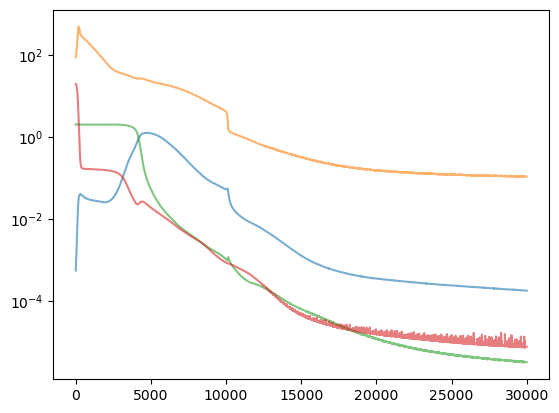

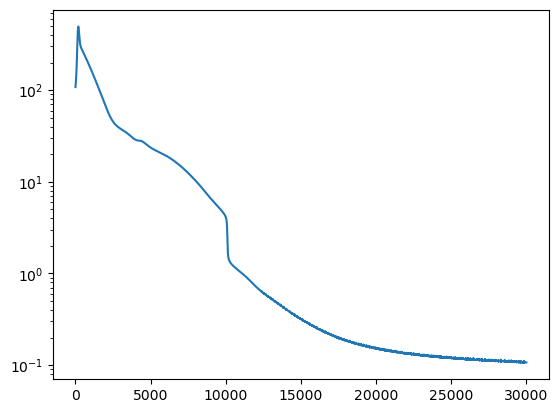

In [89]:

plt.plot(losses[0,:], alpha=.6)
plt.plot(losses[1,:], alpha=.6)
plt.plot(losses[2,:], alpha=.6)
plt.plot(losses[3,:], alpha=.6)
plt.yscale('log'); plt.show()
plt.plot(np.sum(losses, axis=0))
plt.yscale('log');plt.show()


In [90]:
def plot_surf(ax, X,Y, sol, scatter=False):    
    if scatter:
        ax.scatter(X,Y,sol, marker='.')
    else:
        ax.plot_surface(X,Y,sol)
    

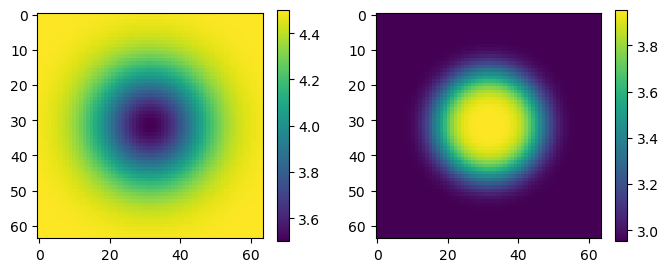

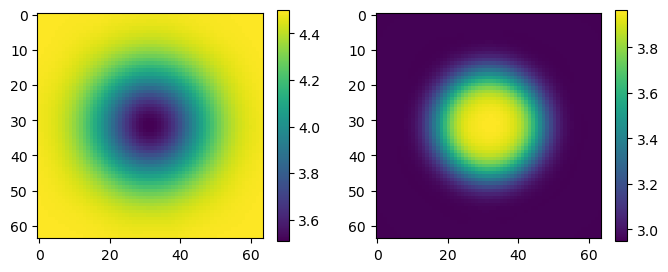

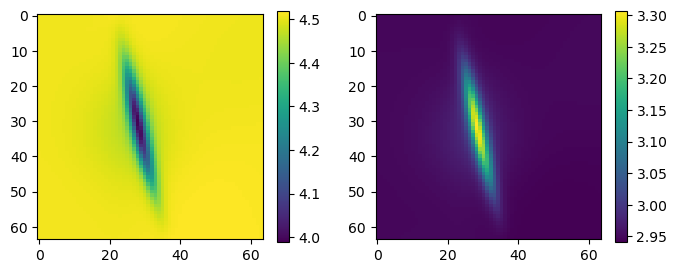

In [91]:
U_hat = Initial_U.cpu().detach().reshape((Ix,Iy))
V_hat = Initial_V.cpu().detach().reshape((Ix,Iy))
_ = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(U_hat)
plt.colorbar(shrink=.75)
plt.subplot(122)
plt.imshow(V_hat)
plt.colorbar(shrink=.75)
plt.show()


solution = model(physics_X).cpu().detach()
U_hat = solution[:Ix*Iy, 0].reshape((Ix,Iy))
V_hat = solution[:Ix*Iy, 1].reshape((Ix,Iy))
_ = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(U_hat)
plt.colorbar(shrink=.75)
plt.subplot(122)
plt.imshow(V_hat)
plt.colorbar(shrink=.75)
plt.show()

U_hat = solution[Ix*Iy*T_max:, 0].reshape((Ix,Iy))
V_hat = solution[Ix*Iy*T_max:, 1].reshape((Ix,Iy))
_ = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(U_hat)
plt.colorbar(shrink=.75)
plt.subplot(122)
plt.imshow(V_hat)
plt.colorbar(shrink=.75)
plt.show()

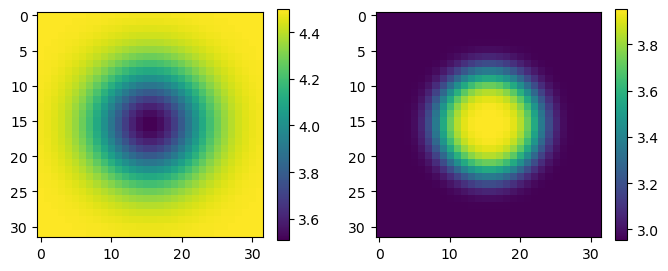

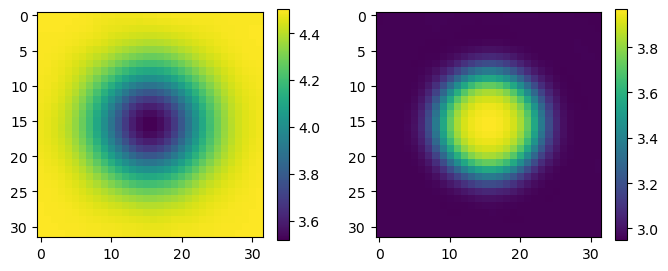

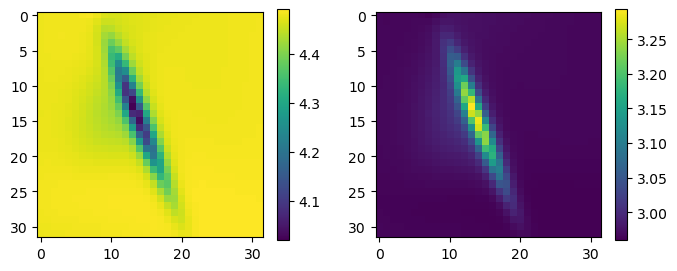

In [85]:
U_hat = Initial_U.cpu().detach().reshape((Ix,Iy))
V_hat = Initial_V.cpu().detach().reshape((Ix,Iy))
_ = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(U_hat)
plt.colorbar(shrink=.75)
plt.subplot(122)
plt.imshow(V_hat)
plt.colorbar(shrink=.75)
plt.show()


solution = model(physics_X).cpu().detach()
U_hat = solution[:Ix*Iy, 0].reshape((Ix,Iy))
V_hat = solution[:Ix*Iy, 1].reshape((Ix,Iy))
_ = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(U_hat)
plt.colorbar(shrink=.75)
plt.subplot(122)
plt.imshow(V_hat)
plt.colorbar(shrink=.75)
plt.show()

U_hat = solution[Ix*Iy*T_max:, 0].reshape((Ix,Iy))
V_hat = solution[Ix*Iy*T_max:, 1].reshape((Ix,Iy))
_ = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(U_hat)
plt.colorbar(shrink=.75)
plt.subplot(122)
plt.imshow(V_hat)
plt.colorbar(shrink=.75)
plt.show()

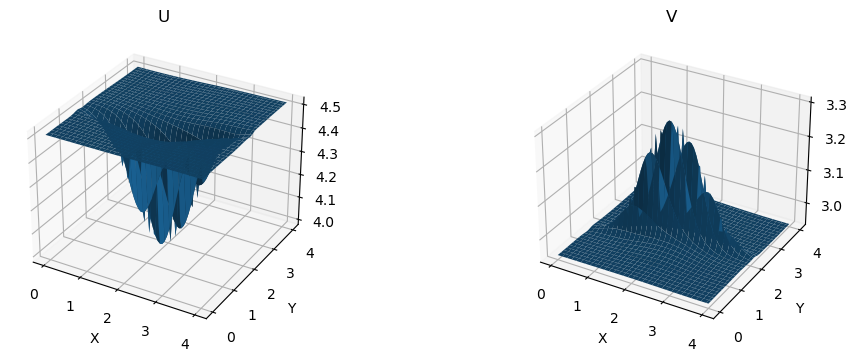

In [92]:
fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(1,2,1,projection='3d')

plot_surf(ax, physics_X[:Ix*Iy,0].cpu().detach().reshape((Ix,Iy)), 
          physics_X[:Ix*Iy,1].cpu().detach().reshape((Ix,Iy)),
          U_hat,
          scatter=False)
plt.title("U"); plt.xlabel("X"); plt.ylabel("Y")    

ax = fig.add_subplot(1,2,2,projection='3d')
plot_surf(ax, physics_X[:Ix*Iy,0].cpu().detach().reshape((Ix,Iy)), 
          physics_X[:Ix*Iy,1].cpu().detach().reshape((Ix,Iy)),
          V_hat,
          scatter=False)
plt.title("V"); plt.xlabel("X"); plt.ylabel("Y")    
plt.show()

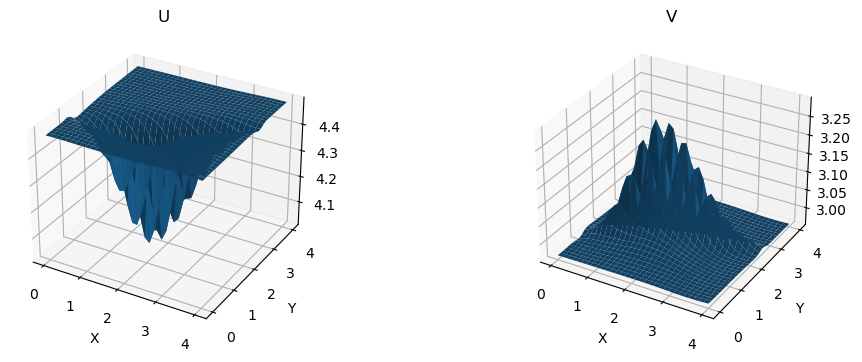

In [86]:
fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(1,2,1,projection='3d')

plot_surf(ax, physics_X[:Ix*Iy,0].cpu().detach().reshape((Ix,Iy)), 
          physics_X[:Ix*Iy,1].cpu().detach().reshape((Ix,Iy)),
          U_hat,
          scatter=False)
plt.title("U"); plt.xlabel("X"); plt.ylabel("Y")    

ax = fig.add_subplot(1,2,2,projection='3d')
plot_surf(ax, physics_X[:Ix*Iy,0].cpu().detach().reshape((Ix,Iy)), 
          physics_X[:Ix*Iy,1].cpu().detach().reshape((Ix,Iy)),
          V_hat,
          scatter=False)
plt.title("V"); plt.xlabel("X"); plt.ylabel("Y")    
plt.show()

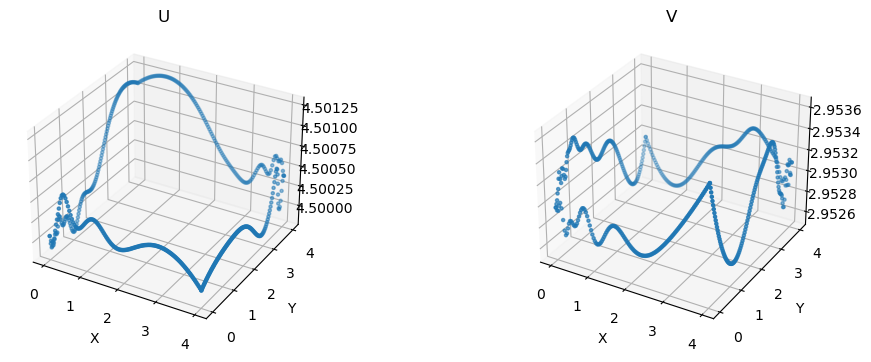

In [32]:
boundary_solution = model(boundary_X).cpu().detach()
fig = plt.figure(figsize=(12,4))

ax = fig.add_subplot(1,2,1,projection='3d')

plot_surf(ax, boundary_X[:,0].cpu().detach(), 
          boundary_X[:,1].cpu().detach(),
          boundary_solution[:,0],
          scatter=True)
plt.title("U"); plt.xlabel("X"); plt.ylabel("Y")    

ax = fig.add_subplot(1,2,2,projection='3d')
plot_surf(ax, boundary_X[:,0].cpu().detach(), 
          boundary_X[:,1].cpu().detach(),
          boundary_solution[:,1],
          scatter=True)
plt.title("V"); plt.xlabel("X"); plt.ylabel("Y")    
plt.show()
